ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

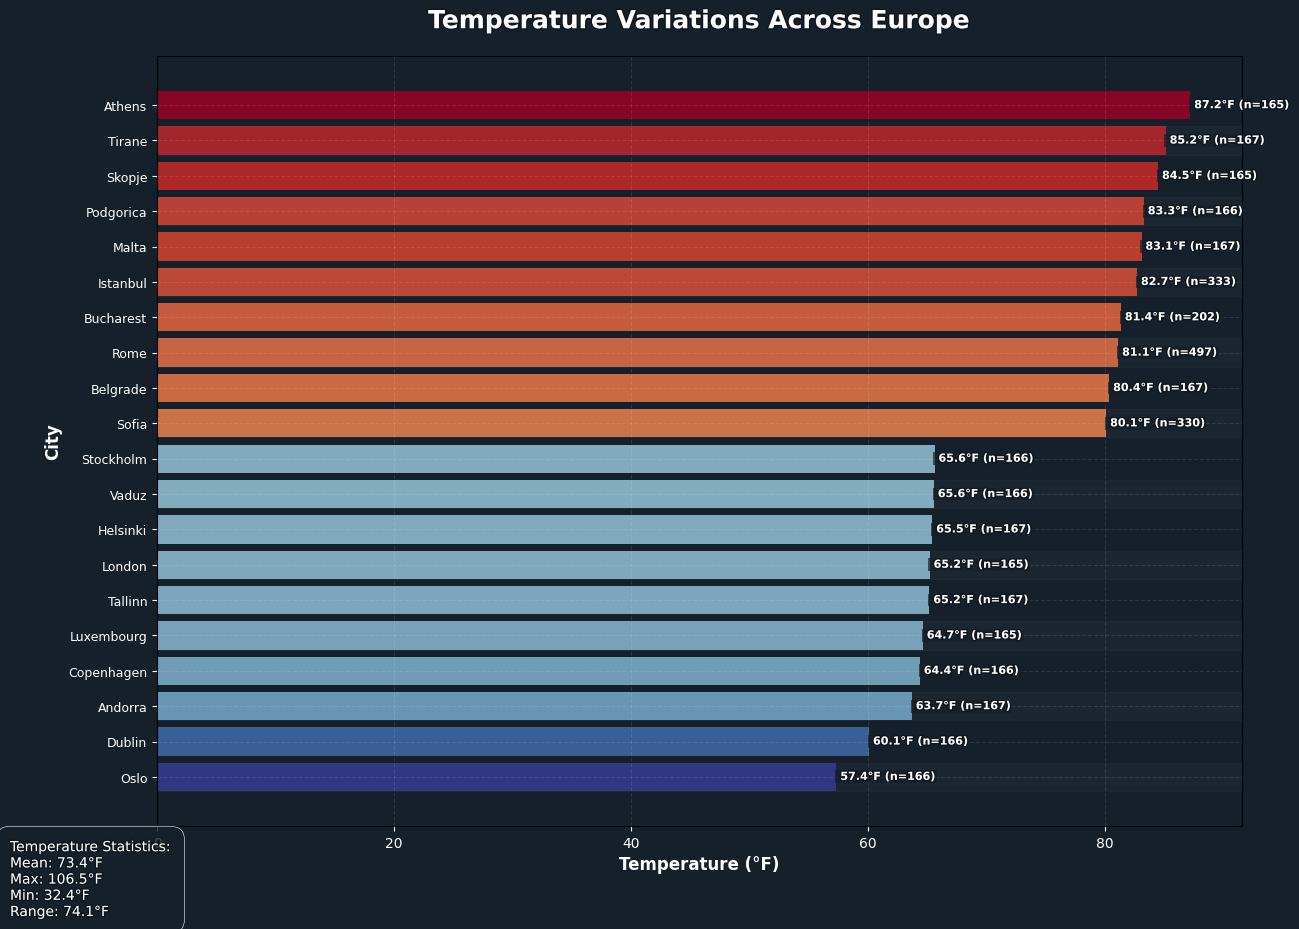

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patheffects as path_effects

def create_europe_temperature_plot(data):
    # Filter for European timezones
    europe_data = data[data['timezone'].str.startswith('Europe/')].copy()
    
    # Process timezone data
    timezone_stats = europe_data.groupby('timezone')['temperature_fahrenheit'].agg(['mean', 'count']).reset_index()
    
    # Create shortened timezone labels
    timezone_stats['city'] = timezone_stats['timezone'].str.split('/', expand=True)[1].str.replace('_', ' ')
    
    # Sort by mean value
    timezone_stats = timezone_stats.sort_values('mean')
    
    # Select top 10 coldest and top 10 hottest cities
    bottom_10 = timezone_stats.head(10)
    top_10 = timezone_stats.tail(10)
    selected_cities = pd.concat([bottom_10, top_10])
    
    # Create figure with wider aspect ratio
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Set dark background with slightly different color
    background_color = '#15202B'  # Darker blue-gray background
    fig.patch.set_facecolor(background_color)
    ax.set_facecolor(background_color)
    
    # Add graduated grid lines
    ax.grid(True, linestyle='--', alpha=0.1, color='white')
    
    # Create gradient color based on temperature
    temperatures = selected_cities['mean']
    norm = plt.Normalize(temperatures.min(), temperatures.max())
    colors = plt.cm.RdYlBu_r(norm(temperatures))  # Red for hot, Blue for cold
    
    # Create horizontal bar chart with gradient colors
    bars = ax.barh(range(len(selected_cities)), selected_cities['mean'], 
                   color=colors, alpha=0.8)
    
    # Add value labels with temperature symbols
    for idx, (bar, count) in enumerate(zip(bars, selected_cities['count'])):
        width = bar.get_width()
        text = ax.text(width, idx,
                f' {width:.1f}°F (n={count})',
                ha='left', va='center', color='white',
                fontsize=8, fontweight='bold',
                bbox=dict(facecolor=background_color, alpha=0.7, 
                         edgecolor='none', pad=1))
        # Add subtle text glow effect
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black', alpha=0.3),
                             path_effects.Normal()])
    
    # Customize axis labels
    ax.set_yticks(range(len(selected_cities)))
    ax.set_yticklabels(selected_cities['city'], fontsize=9)
    
    # Add background color bands for better readability
    for i in range(len(selected_cities)):
        if i % 2 == 0:
            ax.axhspan(i-0.4, i+0.4, color='white', alpha=0.03)
    
    # Customize plot with enhanced title
    title = ax.set_title('Temperature Variations Across Europe', 
                color='white', pad=20, fontsize=18, fontweight='bold')
    title.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black', alpha=0.3),
                           path_effects.Normal()])
    
    ax.set_xlabel('Temperature (°F)', color='white', fontsize=12, fontweight='bold')
    ax.set_ylabel('City', color='white', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    
    # Add enhanced summary statistics with more details
    stats_text = (
        f"Temperature Statistics:\n"
        f"Mean: {europe_data['temperature_fahrenheit'].mean():.1f}°F\n"
        f"Max: {europe_data['temperature_fahrenheit'].max():.1f}°F\n"
        f"Min: {europe_data['temperature_fahrenheit'].min():.1f}°F\n"
        f"Range: {europe_data['temperature_fahrenheit'].max() - europe_data['temperature_fahrenheit'].min():.1f}°F"
    )
    
    # Add stats box with subtle gradient background
    stats_box = fig.text(0.02, 0.02, stats_text, color='white', fontsize=10,
                        bbox=dict(facecolor=background_color, alpha=0.8,
                                 edgecolor='white', linewidth=0.5,
                                 boxstyle='round,pad=1'))
    stats_box.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black', alpha=0.3),
                               path_effects.Normal()])
    
    # Add a subtle color bar to show temperature gradient
    sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlBu_r, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Temperature (°F)', color='white', fontsize=10)
    cbar.ax.yaxis.set_tick_params(color='white')
    cbar.ax.tick_params(colors='white')
    
    plt.tight_layout()
    return fig, ax

# Usage
if __name__ == "__main__":
    import pandas as pd
    
    table = pd.read_csv("GlobalWeatherRepository.csv")
    fig, ax = create_europe_temperature_plot(table)
    plt.show()